In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU

Using TensorFlow backend.


In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [93]:
model = Sequential()

model.add(Dense(10, input_dim=2))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(5))
model.add(Activation('sigmoid'))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_20 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_21 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_22 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)               

In [94]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [95]:
model.fit(X, y, batch_size=4, epochs=3000, verbose=0)
print(model.predict(X))  # 행렬은 4x1이다.  smaple 수 x 클래스수이미르

[[0.33529615]
 [0.33527523]
 [0.9855723 ]
 [0.33528087]]


In [82]:
p = model.predict(X)
print((p > 0.5)*1)

[[0]
 [1]
 [1]
 [0]]


In [96]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)

print(grid)

(2500, 2)
[[0.   0.  ]
 [0.   0.02]
 [0.   0.04]
 ...
 [0.98 0.94]
 [0.98 0.96]
 [0.98 0.98]]


<class 'numpy.ndarray'>
(2500, 1)


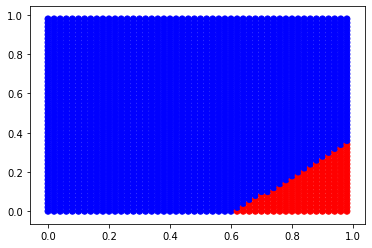

In [97]:
h = model.predict(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors)  


(500,)


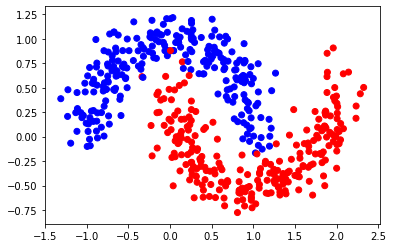

In [100]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

In [ ]:
model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer=Adam(0.01))  
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data))

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

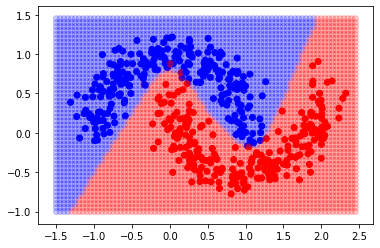